In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib 

/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/james/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Using matplotlib backend: MacOSX


In [3]:
# add one more layer and return the output for this layer
def add_layer(inputs, in_size, out_size, n_layer,activation_function=None):
    layer_name = 'layer%s' % n_layer
    with tf.name_scope('layer'):
        with tf.name_scope('Weights'):
            Weights = tf.Variable(tf.random_normal([in_size,out_size]),name='W')
            tf.summary.histogram(layer_name+'weight',Weights)
        with tf.name_scope('bias'):
            bias = tf.Variable(tf.zeros([1,out_size])+0.1,name='B')
            tf.summary.histogram(layer_name+'bias',bias)
        with tf.name_scope('Wx_plus'):
            Wx_plus_b = tf.add(tf.matmul(inputs,Weights),bias,name='Wx')
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        tf.summary.histogram(layer_name+'output',outputs)
        return outputs

In [4]:
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data)-0.5+ noise

#define placeholder for inputs to network
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32,[None,1],name='x_input')
    ys = tf.placeholder(tf.float32,[None,1],name='y_input')

In [5]:
#layer1 hidden layer

layer1 = add_layer(xs,1,10,n_layer=1,activation_function=tf.nn.relu)
#prediction output layer
prediction = add_layer(layer1,10,1,n_layer =2,activation_function=None)


In [6]:
#calculate loss
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]),name='L') 
    tf.summary.scalar('loss',loss)


In [7]:
#train, how to learn dalta weight
with tf.name_scope('Train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)



In [8]:
#initialize
init = tf.initialize_all_variables()


           
        

Instructions for updating:
Use `tf.global_variables_initializer` instead.


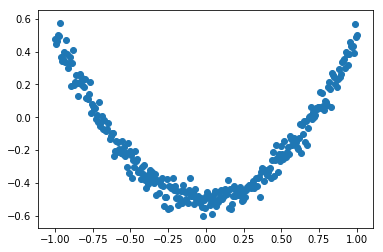

In [10]:
 #可视化拟合图像
with tf.Session() as sess:
    sess.run(init)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_data,y_data)
    plt.ion()
    plt.show()
    for i in range(1000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 50 == 0:
            
       # to visualize the result and improvement
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction, feed_dict={xs: x_data})
            lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
            plt.pause(0.1)
        